In [1]:
import json
import requests
import pandas as pd
import folium 

In [77]:
giro="sushi"
long=19.421336 
lat=-99.162700
mts=1000

In [78]:
response = requests.get("https://www.inegi.org.mx/app/api/denue/v1/consulta/Buscar/{}/{},{}/{}/44522d01-cae7-455b-9b53-7fc7d481cecb".format(giro,long,lat,mts))
results = response.json()

data = pd.DataFrame(response.json())
print(len(data))
data.head()


15


,CP,Calle,CentroComercial,Clase_actividad,Colonia,Correo_e,Estrato,Id,Latitud,Longitud,...,NumLocal,Num_Exterior,Num_Interior,Razon_social,Sitio_internet,Telefono,Tipo,TipoCentroComercial,Tipo_vialidad,Ubicacion
0,06700,PUEBLA,,Restaurantes de autoservicio,ROMA NORTE,,0 a 5 personas,9006764,19.42209434,-99.16525136,...,,,,,,5566748169,Semifijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
1,06700,ORIZABA,,Restaurantes de autoservicio,ROMA NORTE,,0 a 5 personas,7732286,19.42001745,-99.16027657,...,,,,,,,Semifijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
2,06700,COLIMA,,Restaurantes con servicio de preparación de al...,ROMA NORTE,,0 a 5 personas,1029398,19.41884182,-99.16483123,...,,279,0,,,,Semifijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
3,06600,LONDRES,,Restaurantes de autoservicio,JUAREZ,,0 a 5 personas,7732617,19.42457984,-99.16561529,...,,154,,,,,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
4,06600,LONDRES,,Restaurantes con servicio de preparación de al...,JUAREZ,ZONAROSA@SUSHIROLL.MX,31 a 50 personas,1028806,19.42529341,-99.16439056,...,,127,,BUFFET PRIME SA DE CV,WWW.SUSHIROLL.MX,5555112323,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"


In [110]:
www=data.Estrato.value_counts()
sss=data.Clase_actividad.value_counts()

web=data[data['Sitio_internet'].apply(lambda x: len(x)) > 0]

nombre=list(web["Nombre"])
sitio=list(web["Sitio_internet"])
print(sitio[0])
nombre[0]
print(data.Tipo.value_counts())
data.Tipo_vialidad.value_counts()

WWW.SUSHIROLL.MX
Fijo        12
Semifijo     3
Name: Tipo, dtype: int64


CALLE      11
AVENIDA     4
Name: Tipo_vialidad, dtype: int64

In [80]:
info = pd.read_csv('../info.csv')
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466301 entries, 0 to 466300
Data columns (total 16 columns):
Unnamed: 0    466301 non-null int64
id            466301 non-null int64
nom_estab     466301 non-null object
codigo_act    466301 non-null int64
nombre_act    466301 non-null object
tipoCenCom    88178 non-null object
per_ocu       466301 non-null object
tipoUniEco    466301 non-null object
ageb          466285 non-null object
manzana       466285 non-null float64
latitud       466301 non-null float64
longitud      466301 non-null float64
fecha_alta    466301 non-null object
www           37279 non-null object
Año           466301 non-null int64
Mes           466301 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 56.9+ MB


In [81]:


#for e in info.select_dtypes('object').columns:
 #   info[e]=info[e].astype('category')
for e in info.select_dtypes('integer').columns:
    info[e]=pd.to_numeric(info[e], downcast='integer')
for e in info.select_dtypes('float').columns:
    info[e]=pd.to_numeric(info[e], downcast='float')  
    
info["fecha_alta"]=pd.to_datetime(info.fecha_alta)




In [82]:
empresas=data.Id
len(empresas)
d=info[info["id"].isin(empresas)]
d.reset_index(drop=True,inplace=True)
d.info()
d["manzana"]=d.manzana.astype(int)
d["clave"]=d["ageb"].astype(str) + "-" + d["manzana"].astype(str)
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
Unnamed: 0    15 non-null int32
id            15 non-null int32
nom_estab     15 non-null object
codigo_act    15 non-null int32
nombre_act    15 non-null object
tipoCenCom    3 non-null object
per_ocu       15 non-null object
tipoUniEco    15 non-null object
ageb          15 non-null object
manzana       15 non-null float32
latitud       15 non-null float32
longitud      15 non-null float32
fecha_alta    15 non-null datetime64[ns]
www           6 non-null object
Año           15 non-null int16
Mes           15 non-null int8
dtypes: datetime64[ns](1), float32(3), int16(1), int32(3), int8(1), object(7)
memory usage: 1.4+ KB


,Unnamed: 0,id,nom_estab,codigo_act,nombre_act,tipoCenCom,per_ocu,tipoUniEco,ageb,manzana,latitud,longitud,fecha_alta,www,Año,Mes,clave
0,336502,1029730,ALTA COCINA JAPONESA KABUKI SUSHI,722511,Restaurantes con servicio de preparación de al...,NaN,6 a 10 personas,Fijo,1017,22,19.420176,-99.158287,2010-07-01,WWW.KABUKI.MX,2010,7,1017-22
1,342434,6715833,BURRITOS DE SUSHI,722511,Restaurantes con servicio de preparación de al...,CENTRO Y PLAZA COMERCIAL,0 a 5 personas,Fijo,1214,15,19.414042,-99.164528,2016-01-01,WWW.UMAMIBURRITO.COM.MX,2016,1,1214-15
2,372780,8326657,MO - JI SUSHI,722516,Restaurantes de autoservicio,NaN,0 a 5 personas,Fijo,1110,2,19.416327,-99.156616,2019-11-01,WWW.MOJISUSHI.COM,2019,11,1110-2
3,372956,1040457,MR. SUSHI REFORMA 222,722518,Restaurantes que preparan otro tipo de aliment...,EDIFICIO COMERCIAL Y DE SERVICIOS,11 a 30 personas,Fijo,0803,8,19.429096,-99.162094,2011-03-01,NaN,2011,3,0803-8
4,377356,9006764,PUESTO DE SUSHI KONG,722516,Restaurantes de autoservicio,NaN,0 a 5 personas,Semifijo,0998,11,19.422094,-99.165253,2019-11-01,NaN,2019,11,0998-11


In [97]:
llat=list(d.latitud)
llong=list(d.longitud)
name=list(d.nom_estab)

mapa=folium.Map(location=[long, lat], tiles='openstreetmap', zoom_start=15,)

for i in range(len(d)):
    folium.Marker([llat[i], llong[i]], icon=folium.Icon(color='red'),popup=name[i]).add_to(mapa)

    
display(mapa)

mapa.save("../mapas/mapa {}.html".format(giro))

In [83]:
d.fecha_alta.value_counts()

2019-11-01    6
2010-07-01    4
2011-03-01    2
2014-12-01    2
2016-01-01    1
Name: fecha_alta, dtype: int64

In [84]:
'''
dat=pd.DataFrame(d.fecha_alta.value_counts())
dat=dat.sort_index()
dat.index = pd.DatetimeIndex(dat.index).to_period('M')
train=dat[1:-1]
modelo=AR(train).fit()
pred=modelo.predict(8,10)
print(pred)
train
'''

"\ndat=pd.DataFrame(d.fecha_alta.value_counts())\ndat=dat.sort_index()\ndat.index = pd.DatetimeIndex(dat.index).to_period('M')\ntrain=dat[1:-1]\nmodelo=AR(train).fit()\npred=modelo.predict(8,10)\nprint(pred)\ntrain\n"

In [85]:
'''
from sklearn.linear_model import LinearRegression


train=gk[1:-1]
train=train.reset_index(drop=False)
train=train.sort_values(by=['index'])
X=train["index"]
y=train.Año
z="2019"
X.reshape(1, -1)
linreg=LinearRegression(fit_intercept=True)
linreg.fit(X, y)
#y_pred=linreg.predict(X_test)
'''

'\nfrom sklearn.linear_model import LinearRegression\n\n\ntrain=gk[1:-1]\ntrain=train.reset_index(drop=False)\ntrain=train.sort_values(by=[\'index\'])\nX=train["index"]\ny=train.Año\nz="2019"\nX.reshape(1, -1)\nlinreg=LinearRegression(fit_intercept=True)\nlinreg.fit(X, y)\n#y_pred=linreg.predict(X_test)\n'

In [86]:
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact
import matplotlib.pyplot as plt
cf.go_offline()
import seaborn as sns

In [87]:
display(len(d))
gk =pd.DataFrame(d.Año.value_counts())
gk=gk.reset_index(drop=False)
gk=gk.sort_values(by=['index'])
print(gk)
gm =pd.DataFrame(d.Mes.value_counts())
gm=gm.reset_index(drop=False)
gm=gm.sort_values(by=['index'])
gm

15

   index  Año
1   2010    4
3   2011    2
2   2014    2
4   2016    1
0   2019    6


,index,Mes
4,1,1
3,3,2
1,7,4
0,11,6
2,12,2


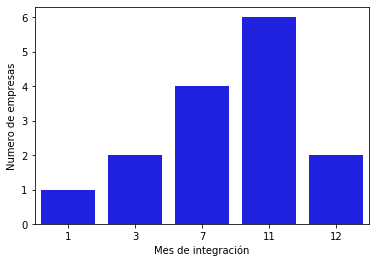

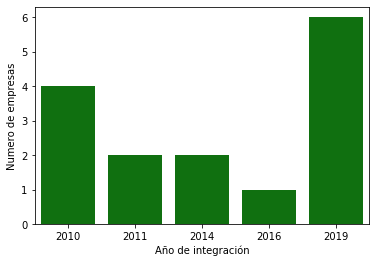

In [88]:
gm.iplot(x='index', y='Mes',kind='bar', xTitle='Mes',yTitle='N. Empresas', title='Mes de integración')
gk.iplot(x='index', y='Año',kind='bar', xTitle='Año',yTitle='N. Empresas', title='Año de integracion....')
ax = sns.barplot(x = 'index', y = 'Mes', data = gm, color = 'b')
ax.set(xlabel='Mes de integración', ylabel='Numero de empresas')
ax.figure.savefig('../images/Mes {}.png'.format(giro))
plt.show()
a2 = sns.barplot(x = 'index', y = 'Año', data = gk, color = 'g')
a2.set(xlabel='Año de integración', ylabel='Numero de empresas')
a2.figure.savefig('../images/Año {}.png'.format(giro))
plt.show()



In [89]:
mask=(gk["index"] > 2011) & (gk["index"] < 2019)
gk.loc[mask]


,index,Año
2,2014,2
4,2016,1


In [90]:
#Indice nacional de precios al consumidor

In [91]:
poblaT = pd.read_csv('../pobclave.csv')
poblaT.head()

,Unnamed: 0,AGEB,MZA,POBTOT,POBMAS,POBFEM,PEA,PEA_M,PEA_F,PE_INAC,PE_INAC_M,PE_INAC_F,clave
0,0,0000,0,8851080,4233783,4617297,4035075,2389679,1645396,3017165,920594,2096571,0000-0
1,1,0000,0,414711,196053,218658,187402,108940,78462,151520,48844,102676,0000-0
2,2,0000,0,414711,196053,218658,187402,108940,78462,151520,48844,102676,0000-0
3,3,0010,0,3424,1600,1824,1398,789,609,1511,552,959,0010-0
4,4,0010,1,202,96,106,75,47,28,97,37,60,0010-1


In [92]:

Evida = pd.read_csv('../Evida.csv')
Evida

,Unnamed: 0,Proba de sobrevivir,Unnamed: 3,Espe. Vida,Age
0,2,0.672031,0.327969,7.435258,0
1,3,0.491375,0.508625,7.790058,1
2,4,0.429555,0.570445,8.163900,2
3,5,0.385694,0.614306,8.557950,3
4,6,0.351672,0.648328,8.972207,4
5,7,0.323874,0.676126,9.396568,5


In [93]:
p=d.clave
len(p)
dx=poblaT[poblaT["clave"].isin(p)]
print(len(dx))

dx["POBMAS"]=dx.POBMAS.str.replace('*' , '0').astype(int)
dx["POBFEM"]=dx.POBFEM.str.replace('*' , '0').astype(int)
dx["PEA"]=dx.PEA.str.replace('*' , '0').astype(int)
dx["PEA_M"]=dx.PEA_M.str.replace('*' , '0').astype(int)
dx["PEA_F"]=dx.PEA_F.str.replace('*' , '0').astype(int)
print(dx.POBTOT.sum())
print(dx.POBMAS.sum())
print(dx.POBFEM.sum())
print(dx.PEA.sum())
print(dx.PEA_M.sum())
print(dx.PEA_F.sum())

14
1841
916
919
1067
630
435


In [100]:
from fpdf import FPDF
 
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Analisis de Supervivencia de Pymes en CDMX", ln=4, align="C")
pdf.cell(90, 10, " ", 0, 2, 'C')   
pdf.multi_cell(0,8,"La palabra de búsqueda es: '{}', con longitud {} y latitud {}\nEsta búsqueda extrae toda la competencia tanto indirecta como directa en \
un rango de {} mts.\nEn total son {} empresas, con {} clases de actividades diferentes, de las cuales destacan ".format(giro,long,lat,mts,len(data),len(data.Clase_actividad.unique())) ,0,10)
pdf.set_font("Arial", size=10)
pdf.cell(200, 10, txt="Da click en botón rojo para ver mapa inteactivo", ln=4, align="C")
pdf.image('../images/red.png'.format(giro), x=55,y=55, w=15, h=9, link = "../mapas/mapa {}.html".format(giro))
pdf.cell(90, 3, " ", 0, 2, 'C')
pdf.set_font("Arial", size=12)
if len(sss) >= 5:
    pdf.multi_cell(0,10,"1. {} : {} \n2. {} : {} \n3. {} : {} \n4. {} : {} \n5. {} : {}".format(sss.index[0],sss[0],sss.index[1],sss[1],sss.index[2],sss[2],sss.index[3],sss[3],sss.index[4],sss[4]) ,1,10)
else:
    pdf.multi_cell(0,10,"1. {} : {} \n2. {} : {}".format(sss.index[0],sss[0],sss.index[1],sss[1]) ,1,10)
pdf.cell(90, 5, " ", 0, 2, 'C')
def simple_table3(spacing=2,align="C"):
    data = [['Tamaño de Empresa', 'Número de empresas'],
            ['{}'.format(www.index[0]), '{}'.format(www[0])],
            ['{}'.format(www.index[1]), '{}'.format(www[1])],
            ['{}'.format(www.index[2]), '{}'.format(www[2])],
            ['{}'.format(www.index[3]), '{}'.format(www[3])],
            ['{}'.format(www.index[4]), '{}'.format(www[4])]
            ]
    col_width = pdf.w / 2.2
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
def simple_table3_5(spacing=2,align="C"):
    data = [['Tamaño de Empresa', 'Número de empresas'],
            ['{}'.format(www.index[0]), '{}'.format(www[0])],
            ['{}'.format(www.index[1]), '{}'.format(www[1])]
            ]
    col_width = pdf.w / 2.2
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
if len(www) >4:
    simple_table3()
else:
    simple_table3_5()
pdf.cell(90, 5, " ", 0, 2, 'C')
def simple_table4(spacing=2,align="C"):
    data = [['Nombre Establecimiento', 'Sitio Web'],
            ['{}'.format(nombre[0]), '{}'.format(sitio[0])],
            ['{}'.format(nombre[1]), '{}'.format(sitio[1])],
            ['{}'.format(nombre[2]), '{}'.format(sitio[2])],
            ['{}'.format(nombre[3]), '{}'.format(sitio[3])],
            ['{}'.format(nombre[4]), '{}'.format(sitio[4])]
            ]
    col_width = pdf.w / 2.2
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table4()
    
pdf.cell(90, 5, " ", 0, 2, 'C')
pdf.multi_cell(0,6,"TABLAS DE INCORPORACIóN A DENUE *INEGI*\n *Por el momento solo contamos con info de Denue, el cual no muestra la fecha de fundación de las empresas esta se utilizaria para ver la demanda del \
servicio/producto asi como hacer modelos que predigan la creación de nuevas empresas en el sector",0,3)
pdf.image('../images/Año {}.png'.format(giro),w=120, h=70)
pdf.image('../images/Mes {}.png'.format(giro),w=120, h=70)

pdf.set_font("Arial", size=12)
pdf.cell(94, 10, " ", 0, 2, 'C')   
def simple_table2(spacing=1.5):
    data = [['Años', 'Prob. de Sobrevivir','Esperanza de Vida'],
            ['0', '0.672031','7.435258'],
            ['1', '0.491375','7.790058'],
            ['2', '0.429555','8.163900'],
            ['3', '0.385694','8.557950'],
            ['4', '0.351672','8.972207']
            ]
    col_width = pdf.w / 3.4
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table2()
pdf.cell(200, 15, txt="Población 'Atendida'", ln=4)
def simple_table(spacing=2,align="C"):
    data = [['Población Total', '{}'.format(dx.POBTOT.sum())],
            ['Población Masculina', '{}'.format(dx.POBMAS.sum())],
            ['Población Femenina', '{}'.format(dx.POBFEM.sum())],
            ['Población Economicamente Activa', '{}'.format(dx.PEA.sum())],
            ['Población M. Economicamente Activa', '{}'.format(dx.PEA_M.sum())],
            ['Población M. Economicamente Activa', '{}'.format(dx.PEA_F.sum())]
            ]
    col_width = pdf.w / 2.2
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table()


pdf.output("simple_demo.pdf",'F')

''